### Objective Proposal:

The [geometry paper](https://www.biorxiv.org/content/10.1101/2021.12.13.472494v1.full.pdf) concluded that the brain has representational drift to prevent overfitting (e.g. by introducing dropout like noise). Let's see if adding dropout to [CORnet](https://www.biorxiv.org/content/10.1101/408385v1.full.pdf) produces similar looking correlation figures to those found in the [Current Bio Paper](https://www.sciencedirect.com/science/article/pii/S0960982221010526) (see below).

Fine-tune pretrained CORnet on CIFAR100 with dropout until steady test acc is achieved. Then continually train it on the training split, stopping periodically to get representations from all layers (i.e. V1, V2, V4, & IT). Track test acc after ~ each epoch to ensure "behavior" is stable.

### Outstanding considerations:

Could add synthetic image classes to CIFAR100. Test if drift is different for this set of classes.

Same dropout noise for each epoch, or resample at each inference like geometry did? 
Use test like inference on the dropout layers or training style?

### Current Bio S1[a-c]:

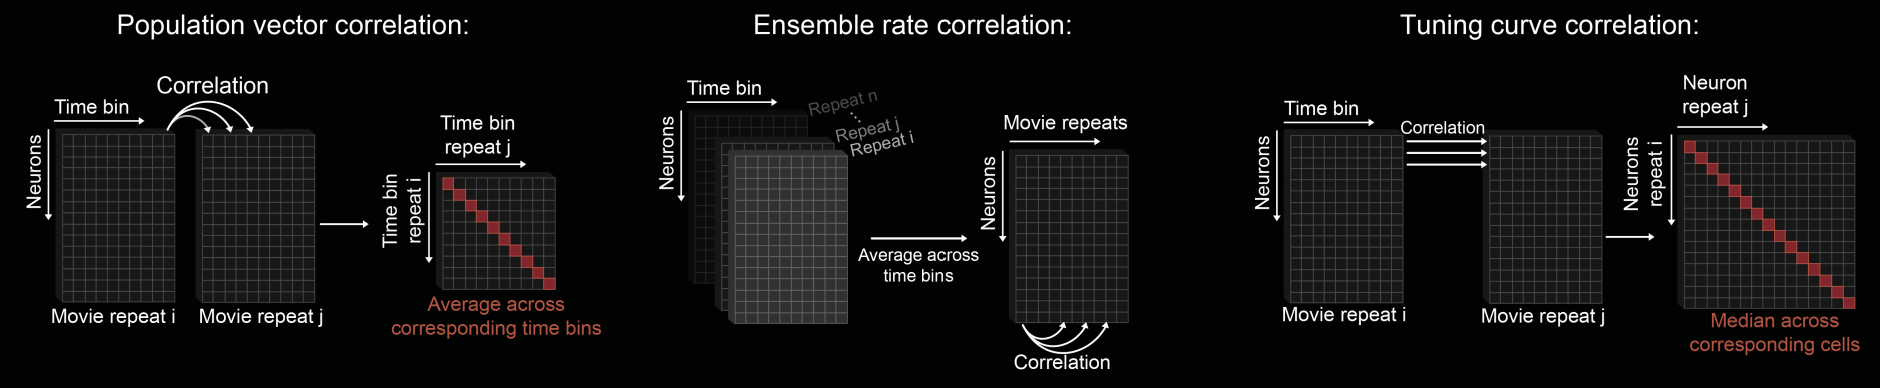

### Current Bio Fig 2 (neuropx):

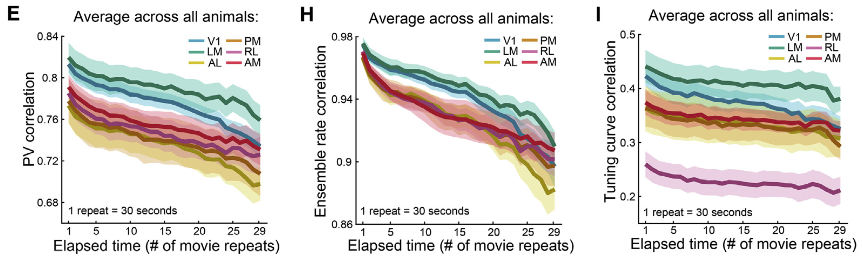

### Current Bio Fig 3:

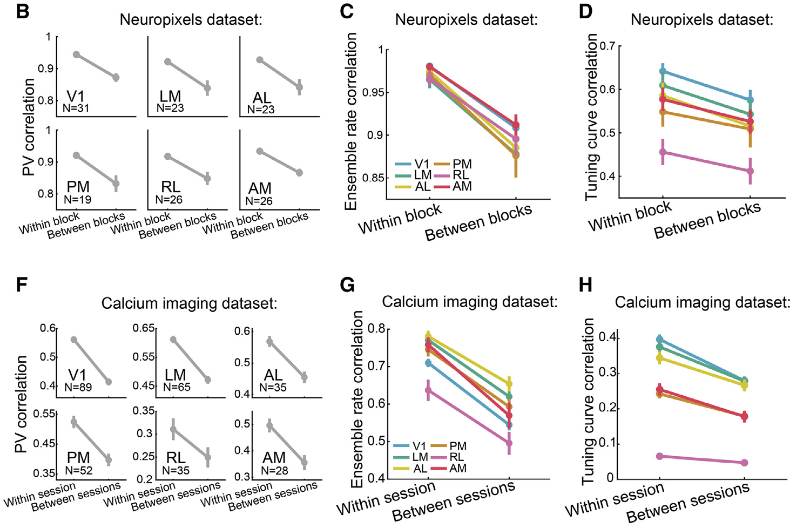

### CORnet architecture

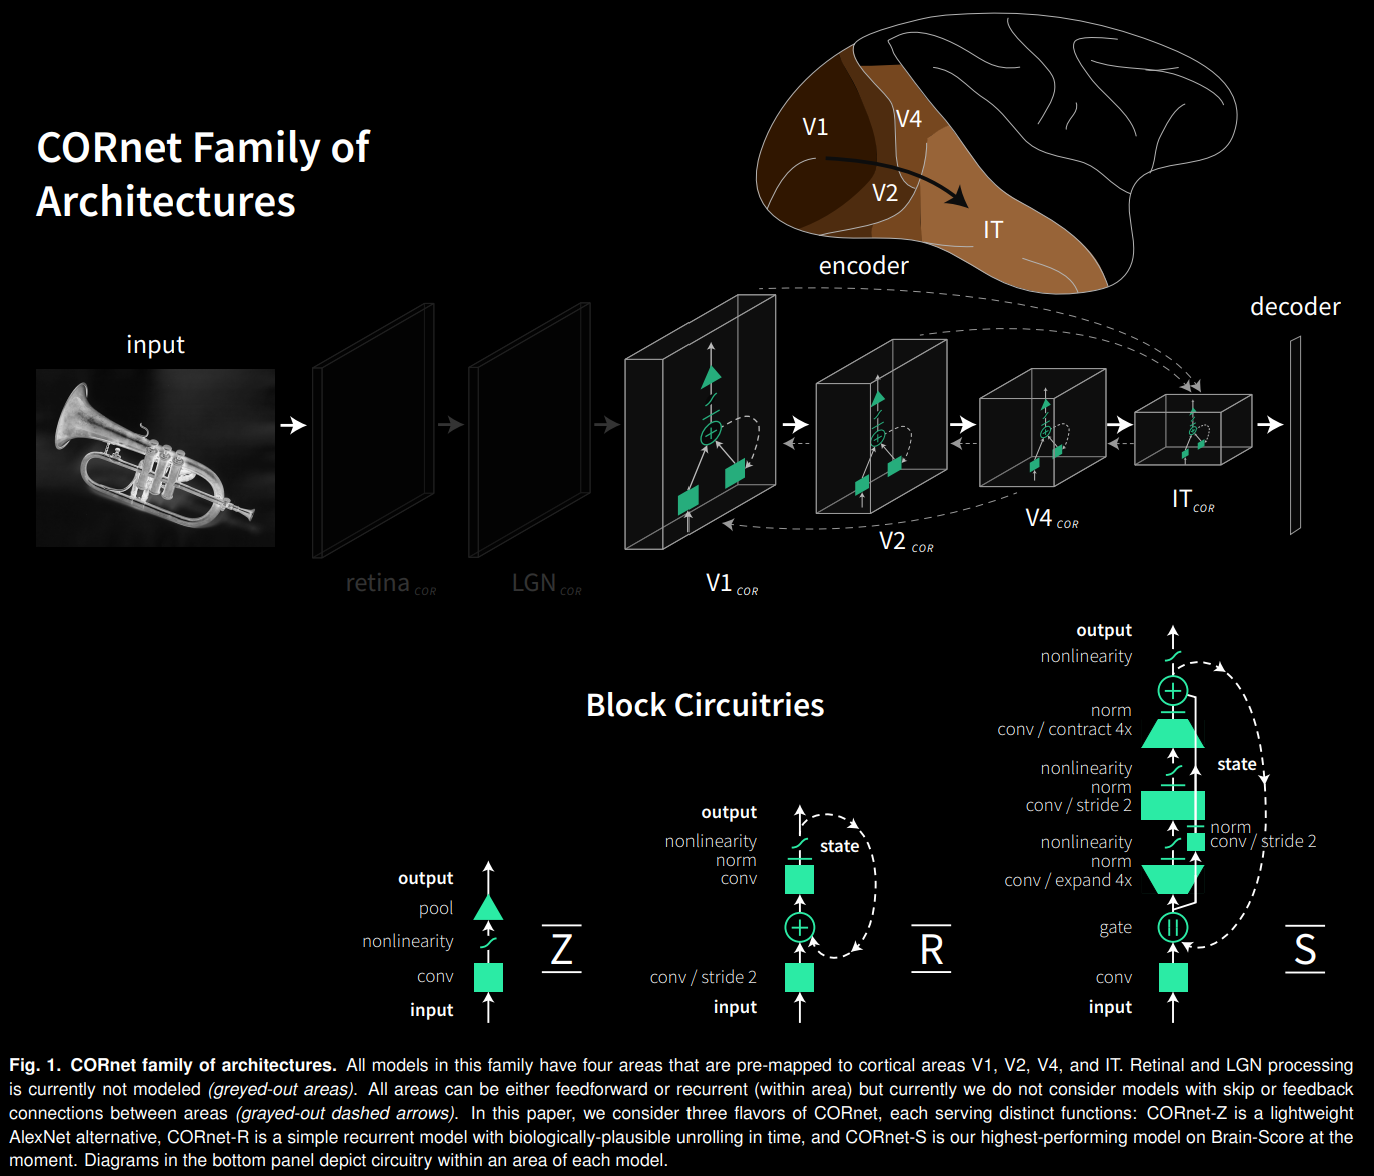

CORnet does not include skip connections or recurrence between cortical areas (see caption). Still the case for the newer 2019 [paper](https://arxiv.org/pdf/1909.06161.pdf):

>There are no across-area bypass or across-area feedback connections in the current definition of CORnet-S and retinal and LGN processing are not explicitly modeled.

### CORnet code:
>[github repo](https://github.com/bainro/CORnet_drift)

In [1]:
import os
import torch

# torch >= 0.4.0
torch.__version__
assert torch.cuda.is_available(), "don't you want gpu acceleration :/ ?"

/home/rbain/anaconda3/envs/drift/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
### simple but missing access to scripts (?) e.g. run.py
# !pip install git+https://github.com/bainro/CORnet_drift
### can access the scripts by cloning the repo instead of pip installing
# !git clone https://github.com/bainro/CORnet_drift.git
### pull latest updates fromo github
!git -C CORnet_drift pull

remote: Enumerating objects: 7, done.
remote: Counting objects: 100% (7/7), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 4 (delta 3), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (4/4), 747 bytes | 373.00 KiB/s, done.
From https://github.com/bainro/CORnet_drift
   f228a8a..c582853  master     -> origin/master
Updating f228a8a..c582853
Fast-forward
 cornet/cornet_z.py | 6 +++---
 1 file changed, 3 insertions(+), 3 deletions(-)


[CORnet](https://www.biorxiv.org/content/10.1101/408385v1.full.pdf) R & Z are about equal brain scores. S > R > Z on ImageNet:

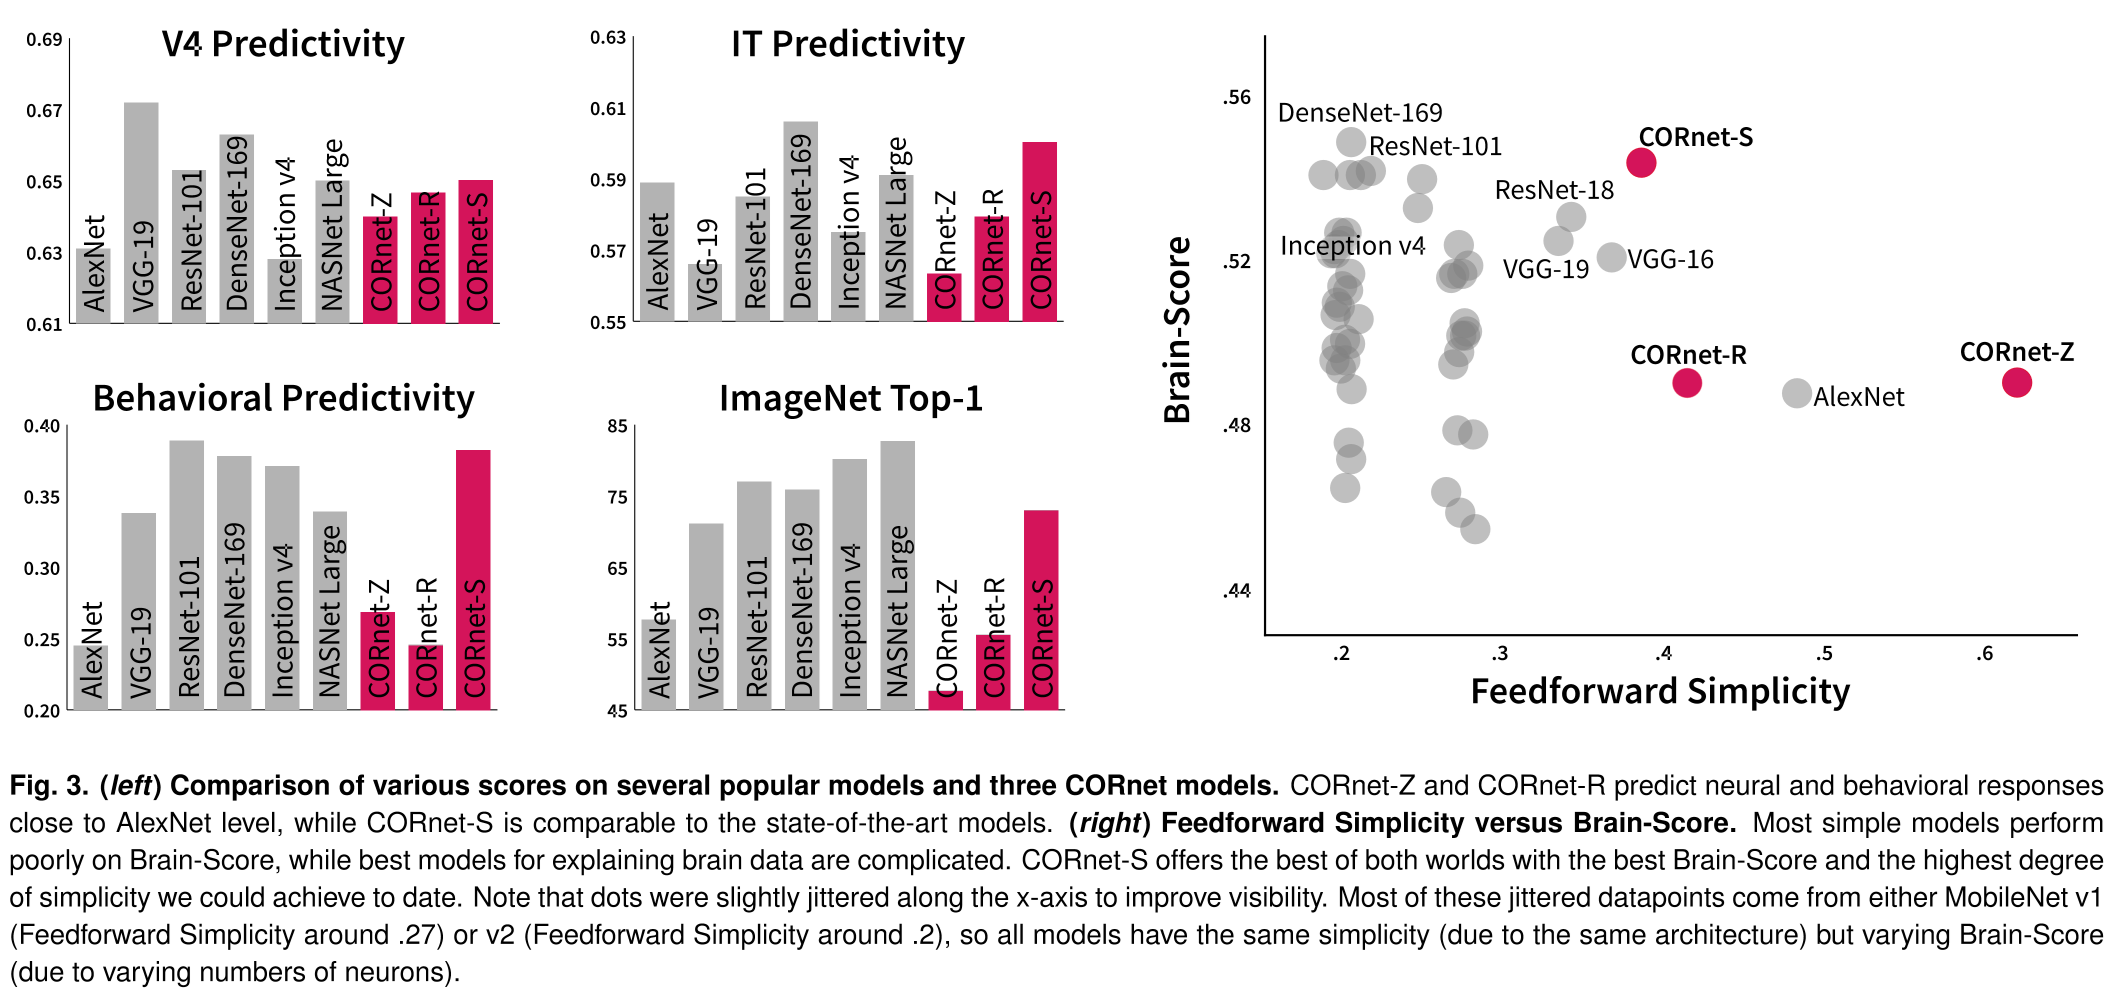

This [paper](https://www.researchgate.net/publication/338570912_Training_neural_networks_to_mimic_the_brain_improves_object_recognition_performance) got CORnet-Z to ~50% test acc on CIFAR100.

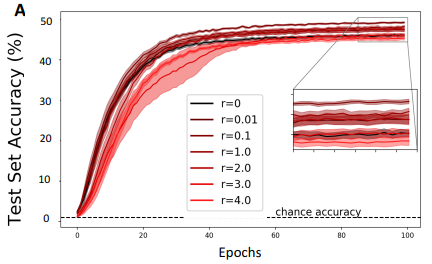

##### TODO:
- See how long training the S model takes.
- Search for dropout percentage(s). Cross-validation or validation split necessary?
- dropout flag is fake currently, it's hardcoded on github 
- Log and visualize training/testing accuracy
- set GPUs correctly. Always using both.
- Add save model fx

### CORnet-Z without dropout (48% test acc):

In [6]:
### train on CIFAR100
!python CORnet_drift/run.py train --model Z --ngpus 1 --epochs 5

Files already downloaded and verified
Files already downloaded and verified
train:   0%|                                            | 0/391 [00:00<?, ?it/s]

val:   0%|                                               | 0/79 [00:00<?, ?it/s]

val:   1%|▍                                      | 1/79 [00:03<05:11,  4.00s/it]

val:  20%|███████▋                              | 16/79 [00:04<00:11,  5.42it/s]

val:  39%|██████████████▉                       | 31/79 [00:04<00:03, 12.20it/s]

val:  59%|██████████████████████▌               | 47/79 [00:04<00:01, 21.41it/s]

val:  80%|██████████████████████████████▎       | 63/79 [00:04<00:00, 32.67it/s]

val: 100%|██████████████████████████████████████| 79/79 [00:04<00:00, 17.27it/s]
{'meta': {'epoch': 0, 'step_in_epoch': 0, 'wall_time': 1658258986.2138789},
 'val': {'dur': 0.0579079465021061, 'loss': 4.60844001083374, 'top1': 0.0127}}

train:   0%|                                    | 1/391 [00:05<33:26,  5.15s/it]{'meta': {'epoch': 0.002557544757

### CORnet-Z with p=.1 dropout (46% test acc):

Conv layers require different amounts of dropout ([link](http://mipal.snu.ac.kr/images/1/16/Dropout_ACCV2016.pdf)).

In [10]:
# create output folder if it does not already exist
out_dir = "./tmp"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)

### train on CIFAR100
!python CORnet_drift/run.py train --model Z --ngpus 1 --epochs 5 --dropout #--o {out_dir}

Files already downloaded and verified
Files already downloaded and verified
train:   0%|                                            | 0/391 [00:00<?, ?it/s]

val:   0%|                                               | 0/79 [00:00<?, ?it/s]

val:   1%|▍                                      | 1/79 [00:02<03:01,  2.32s/it]

val:  20%|███████▋                              | 16/79 [00:02<00:06,  9.07it/s]

val:  39%|██████████████▉                       | 31/79 [00:02<00:02, 19.80it/s]

val:  58%|██████████████████████▏               | 46/79 [00:02<00:01, 32.56it/s]

val:  77%|█████████████████████████████▎        | 61/79 [00:02<00:00, 46.96it/s]

val: 100%|██████████████████████████████████████| 79/79 [00:02<00:00, 27.00it/s]
{'meta': {'epoch': 0, 'step_in_epoch': 0, 'wall_time': 1658259174.3891244},
 'val': {'dur': 0.03704578665238392, 'loss': 4.608440041351319, 'top1': 0.0127}}

train:   0%|                                    | 1/391 [00:03<21:11,  3.26s/it]{'meta': {'epoch': 0.0025575447

### CORnet-S without dropout (??% test acc)

In [ ]:
### train on CIFAR100
!git -C CORnet_drift pull
!python CORnet_drift/run.py train --model S --ngpus 1 --epochs 10 --dropout --o "s_no_dropout_saves"

### CORnet-S with p=.1 dropout (??% test acc)

In [ ]:
### train on CIFAR100
!git -C CORnet_drift pull
!python CORnet_drift/run.py train --model S --ngpus 1 --epochs 10 --dropout --o "s_p.1_dropout_saves"

### Save CORnet-z's outputs from test images

In [9]:
# create output folder if it does not already exist
out_dir = "./outputs"
if not os.path.exists(out_dir):
    os.mkdir(out_dir)
    
### test on CIFAR100 & save model representations
! python CORnet_drift/run.py test --model Z --ngpus 1 -o {out_dir}

Downloading: "https://s3.amazonaws.com/cornet-models/cornet_z-5c427c9c.pth" to /home/rbain/.cache/torch/hub/checkpoints/cornet_z-5c427c9c.pth
100%|██████████████████████████████████████| 15.8M/15.8M [00:01<00:00, 15.8MB/s]
Traceback (most recent call last):
  File "CORnet_drift/run.py", line 352, in <module>
    fire.Fire(command=FIRE_FLAGS)
  File "/home/rbain/anaconda3/envs/drift/lib/python3.8/site-packages/fire/core.py", line 141, in Fire
    component_trace = _Fire(component, args, parsed_flag_args, context, name)
  File "/home/rbain/anaconda3/envs/drift/lib/python3.8/site-packages/fire/core.py", line 466, in _Fire
    component, remaining_args = _CallAndUpdateTrace(
  File "/home/rbain/anaconda3/envs/drift/lib/python3.8/site-packages/fire/core.py", line 681, in _CallAndUpdateTrace
    component = fn(*varargs, **kwargs)
  File "CORnet_drift/run.py", line 193, in test
    model = get_model(pretrained=True)
  File "CORnet_drift/run.py", line 84, in get_model
    model = model(pretrai

### pip package version of CORnet_drift:

In [11]:
import cornet

### no documentation for pip package (?) so exploring
dir(cornet)
# dir(cornet.CORnet_Z)
z_model = cornet.CORnet_Z(num_classes=1000)

# create test_images dataset if it does not already exist
test_dir = "./test_images"
if not os.path.exists(test_dir):
    import requests
    os.mkdir(test_dir)
    # CIFAR10 test image from some github repo
    image_url = "https://github.com/YoongiKim/CIFAR-10-images/raw/master/test/bird/0000.jpg"
    image_data = requests.get(image_url).content
    image_path = os.path.join(test_dir, "bird.jpg")
    with open(image_path, 'wb') as handler:
        handler.write(image_data)

### conda env setup code:

In [ ]:
### run once on a server / env
#!pip install jupyterthemes
### lists available color schemes
# !jt -l
### sets notebook to darkmode
#!jt -t onedork -T -N -kl
### reset default
# !jt -r
### might need to modify to work w/ colab
#!conda install pytorch torchvision torchaudio cudatoolkit=11.6 -c pytorch -c conda-forge